In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization,ReLU,ReLU,Softmax
from tensorflow.keras.utils import to_categorical, plot_model
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import  KFold
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/1.csv')

In [ ]:
print(data.head())
print(data.info())
print(data.describe())

   0.102581735489803  0.724556409349005  0.764948186436089  0.757163322363814  \
0           0.602749           0.284292           0.720245           0.741244   
1           0.760409           0.134785           0.716614           0.507548   
2           0.762393           0.208646           0.642720           0.605443   
3           0.815246           0.441437           0.365664           0.809652   
4           0.673585           0.625720           0.320228           0.700190   

   0.530662468164046  0.371689696046641  0.284461706937353  0.444367899771322  \
0           0.454986           0.633573           0.290452           0.806809   
1           0.671592           0.697440           0.538643           0.449177   
2           0.899200           0.503576           0.430611           0.180712   
3           0.773291           0.481069           0.102943           0.384725   
4           0.499120           0.709004           0.181829           0.673383   

   0.714094925340514  0.32

In [ ]:
feature_columns = data.columns[:-1]
label_column = data.columns[-1]

In [ ]:
# Extract features and labels
X = data[feature_columns]
y = data[label_column]

In [ ]:
# Convert labels to numeric
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Number of samples
num_cases_per_sample = 251

# Create samples
samples = []
labels = []

num_samples = len(X) // num_cases_per_sample

for i in range(num_samples):
    start_index = i * num_cases_per_sample
    end_index = start_index + num_cases_per_sample

    # Extract the sample and the corresponding labels
    sample_X = X.iloc[start_index:end_index]
    sample_y = y_encoded[start_index:end_index]

    # Convert the 2D sample to a 3D vector (num_cases_per_sample, num_features, 1)
    sample_X_3d = sample_X.values.reshape(num_cases_per_sample, -1, 1)

    # Append the 3D vector to the samples list
    samples.append(sample_X_3d)

    # Majority voting for the label
    label = np.bincount(sample_y).argmax()  # Choosing the most frequent label in the sample
    labels.append(label)

# Convert the list of samples and labels to NumPy arrays
X_samples = np.array(samples)
y_samples = np.array(labels)

In [ ]:
np.unique(y_samples)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38])

In [ ]:
num_classes = len(np.unique(y_samples))

In [ ]:
def create_cnn_model(input_shape, num_classes):
    model = Sequential([

    Conv2D(8, (3, 3), activation='relu', input_shape=(num_cases_per_sample, X.shape[1], 1)),

    # 3. Batch Normalization
    BatchNormalization(),

    # 4. ReLU Activation
    ReLU(),

    # 5. 2-D Max Pooling: 2x2 pool size, stride 2x2, no padding
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

    # 6. 2-D Convolution: 16 filters, 3x3 kernel size, stride 1x1, 'same' padding
    Conv2D(16, (3, 3), strides=(1, 1), padding='same'),

    # 7. Batch Normalization
    BatchNormalization(),

    # 8. ReLU Activation
    ReLU(),

    # 9. 2-D Max Pooling: 2x2 pool size, stride 2x2, no padding
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

    # 10. 2-D Convolution: 32 filters, 3x3 kernel size, stride 1x1, 'same' padding
    Conv2D(32, (3, 3), strides=(1, 1), padding='same'),

    # 11. Batch Normalization
    BatchNormalization(),

    # 12. ReLU Activation
    ReLU(),

    # 13. Flatten the output before passing it to the fully connected layer
    Flatten(),

    # 14. Fully Connected Layer: 39 units
    Dense(39),

    # 15. Softmax Layer for classification
    Softmax()
])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)
    return model

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 249, 17, 8)          │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 249, 17, 8)          │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_6 (ReLU)                       │ (None, 249, 17, 8)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 124, 8, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 124, 8, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 124, 8, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_7 (ReLU)                       │ (None, 124, 8, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 4, 16)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 62, 4, 32)           │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 62, 4, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_8 (ReLU)                       │ (None, 62, 4, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 7936)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 39)                  │         309,543 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_2 (Softmax)                  │ (None, 39)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,655 (1.20 MB)

 Trainable params: 315,543 (1.20 MB)

 Non-trainable params: 112 (448.00 B)

Training for fold 1 ...
Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.4676 - loss: 3.4398 - val_accuracy: 0.1040 - val_loss: 3.4451
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.8902 - loss: 0.4220 - val_accuracy: 0.1040 - val_loss: 3.4715
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9689 - loss: 0.1150 - val_accuracy: 0.0960 - val_loss: 3.2561
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9769 - loss: 0.0440 - val_accuracy: 0.0960 - val_loss: 2.9403
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.2240 - val_loss: 2.3676
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.6560 - val_loss: 1.5547
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9826 - loss: 0.0916 - val_accuracy: 0.8960 - val_loss: 0.4310
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9879 - loss: 0.0174 - 

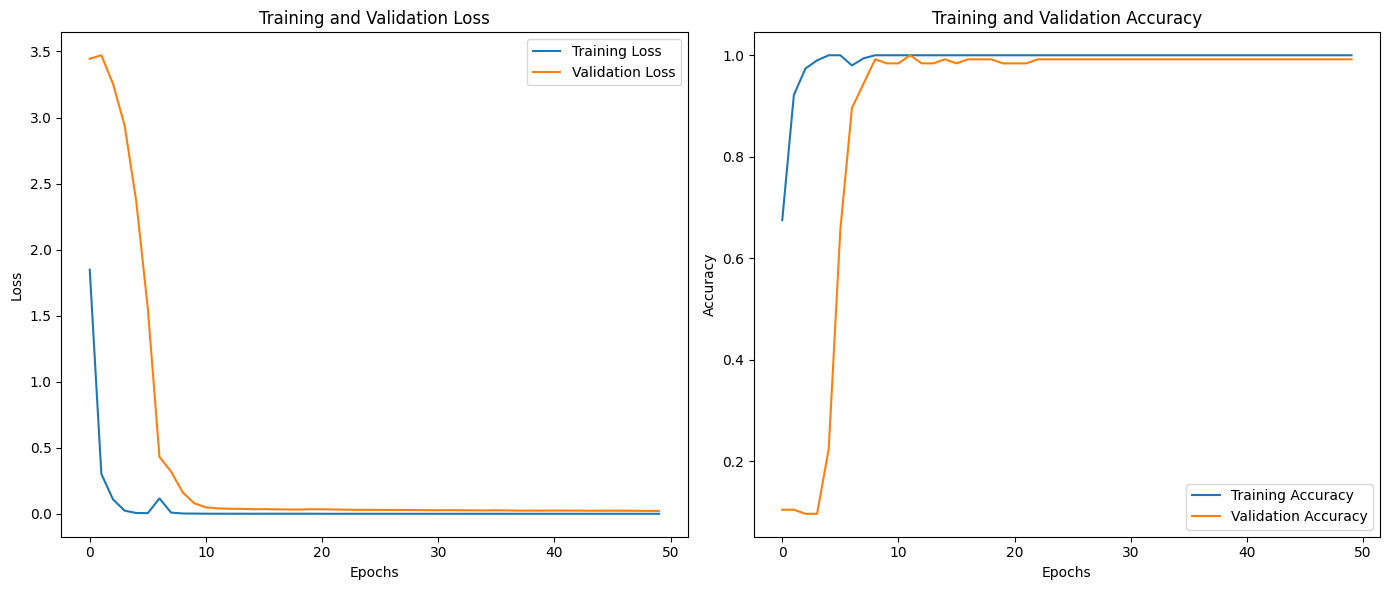

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 249, 17, 8)          │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 249, 17, 8)          │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_9 (ReLU)                       │ (None, 249, 17, 8)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 124, 8, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 124, 8, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 124, 8, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_10 (ReLU)                      │ (None, 124, 8, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 4, 16)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 62, 4, 32)           │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 62, 4, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_11 (ReLU)                      │ (None, 62, 4, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 7936)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 39)                  │         309,543 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_3 (Softmax)                  │ (None, 39)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,655 (1.20 MB)

 Trainable params: 315,543 (1.20 MB)

 Non-trainable params: 112 (448.00 B)

Training for fold 2 ...
Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.4209 - loss: 3.3895 - val_accuracy: 0.0400 - val_loss: 3.7208
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9404 - loss: 0.2183 - val_accuracy: 0.0400 - val_loss: 4.3026
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9657 - loss: 0.0952 - val_accuracy: 0.0400 - val_loss: 4.1264
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9945 - loss: 0.0259 - val_accuracy: 0.1520 - val_loss: 3.2722
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9953 - loss: 0.0375 - val_accuracy: 0.4480 - val_loss: 1.9054
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 0.8240 - val_loss: 0.6963
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 0.9440 - val_loss: 0.2257
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9944 - loss: 0.0182 - 

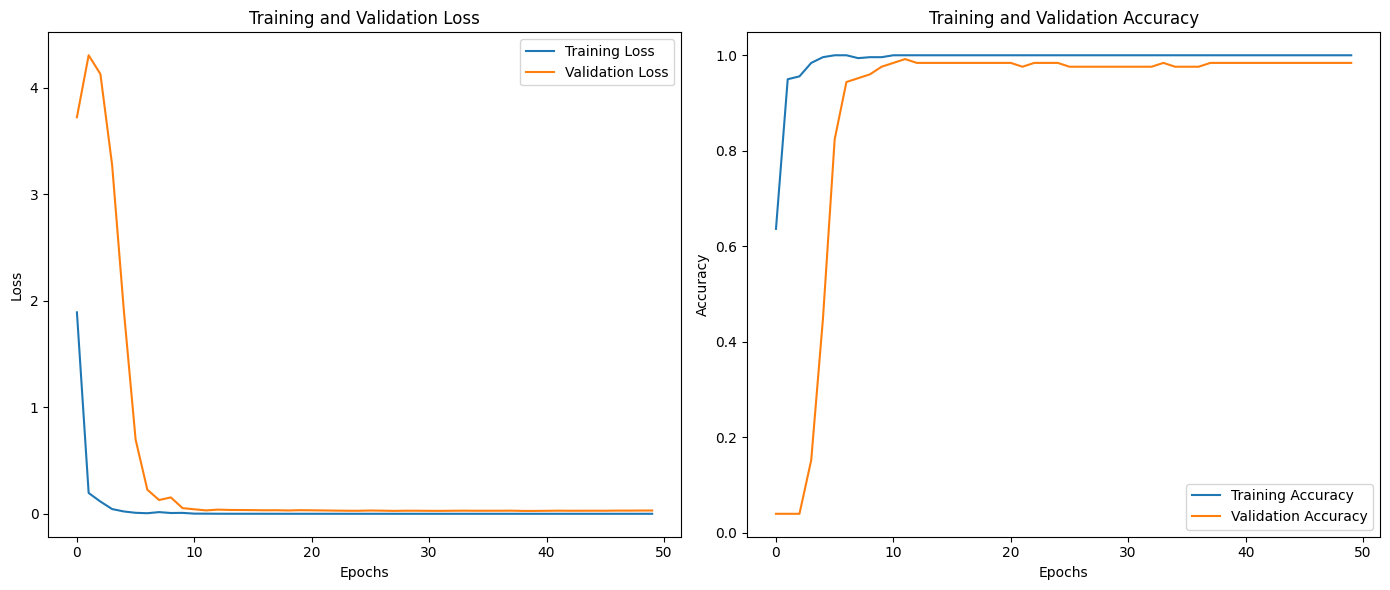

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         4
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 249, 17, 8)          │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 249, 17, 8)          │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_12 (ReLU)                      │ (None, 249, 17, 8)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 124, 8, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 124, 8, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 124, 8, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_13 (ReLU)                      │ (None, 124, 8, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 62, 4, 16)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 62, 4, 32)           │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 62, 4, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_14 (ReLU)                      │ (None, 62, 4, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 7936)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 39)                  │         309,543 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_4 (Softmax)                  │ (None, 39)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,655 (1.20 MB)

 Trainable params: 315,543 (1.20 MB)

 Non-trainable params: 112 (448.00 B)

Training for fold 3 ...
Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.5106 - loss: 3.0776 - val_accuracy: 0.0720 - val_loss: 3.4453
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9395 - loss: 0.1764 - val_accuracy: 0.0400 - val_loss: 3.5356
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9731 - loss: 0.1132 - val_accuracy: 0.0480 - val_loss: 3.1872
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9942 - loss: 0.0284 - val_accuracy: 0.2640 - val_loss: 2.7435
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.5840 - val_loss: 2.1425
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.7360 - val_loss: 1.3656
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.8400 - val_loss: 0.7119
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 1.0000 - loss: 9.6487e-0

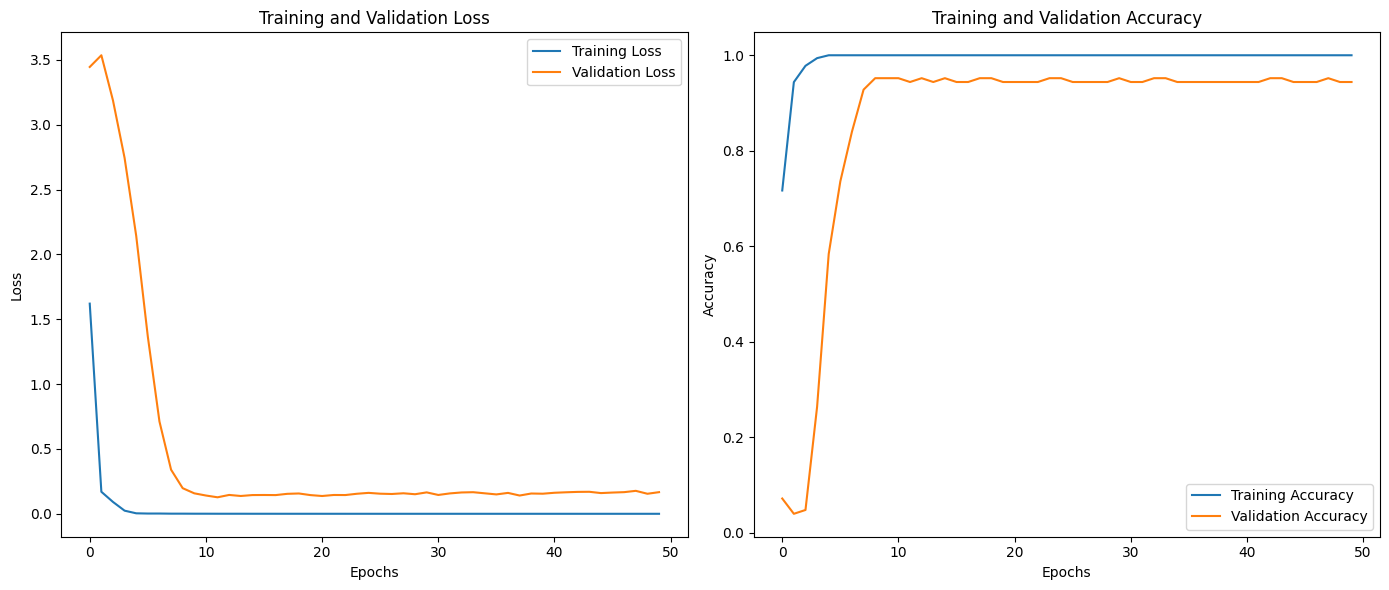

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       0.38      0.75      0.50         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 249, 17, 8)          │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 249, 17, 8)          │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_15 (ReLU)                      │ (None, 249, 17, 8)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 124, 8, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 124, 8, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 124, 8, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_16 (ReLU)                      │ (None, 124, 8, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 62, 4, 16)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 62, 4, 32)           │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 62, 4, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_17 (ReLU)                      │ (None, 62, 4, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 7936)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 39)                  │         309,543 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_5 (Softmax)                  │ (None, 39)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,655 (1.20 MB)

 Trainable params: 315,543 (1.20 MB)

 Non-trainable params: 112 (448.00 B)

Training for fold 4 ...
Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.4748 - loss: 3.3451 - val_accuracy: 0.0565 - val_loss: 3.3633
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9155 - loss: 0.2850 - val_accuracy: 0.0161 - val_loss: 3.3739
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9464 - loss: 0.2496 - val_accuracy: 0.0726 - val_loss: 3.2949
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9766 - loss: 0.1165 - val_accuracy: 0.0726 - val_loss: 2.9941
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9727 - loss: 0.0636 - val_accuracy: 0.3306 - val_loss: 2.2801
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9931 - loss: 0.0147 - val_accuracy: 0.7581 - val_loss: 1.2960
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9904 - loss: 0.0281 - val_accuracy: 0.9032 - val_loss: 0.6895
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9972 - loss: 0.0093 - 

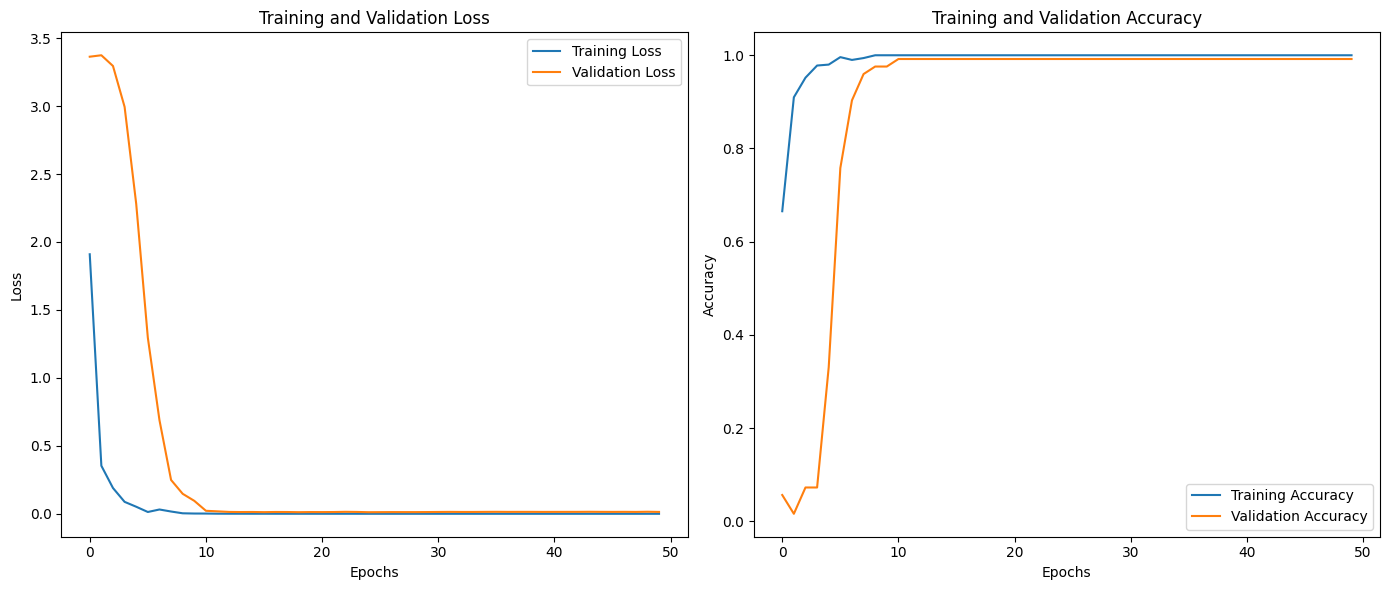

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         4
          17       1.00      1.00      1.00

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 249, 17, 8)          │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 249, 17, 8)          │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_18 (ReLU)                      │ (None, 249, 17, 8)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 124, 8, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 124, 8, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 124, 8, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_19 (ReLU)                      │ (None, 124, 8, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 4, 16)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 62, 4, 32)           │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 62, 4, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_20 (ReLU)                      │ (None, 62, 4, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 7936)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 39)                  │         309,543 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_6 (Softmax)                  │ (None, 39)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,655 (1.20 MB)

 Trainable params: 315,543 (1.20 MB)

 Non-trainable params: 112 (448.00 B)

Training for fold 5 ...
Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.4133 - loss: 3.4730 - val_accuracy: 0.0161 - val_loss: 4.5280
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9153 - loss: 0.3908 - val_accuracy: 0.0161 - val_loss: 5.2056
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9756 - loss: 0.0629 - val_accuracy: 0.0161 - val_loss: 4.7363
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9860 - loss: 0.0283 - val_accuracy: 0.0242 - val_loss: 3.3908
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9963 - loss: 0.0143 - val_accuracy: 0.2661 - val_loss: 2.2668
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.9924 - loss: 0.0134 - val_accuracy: 0.7339 - val_loss: 1.1729
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.9943 - loss: 0.0072 - val_accuracy: 0.9113 - val_loss: 0.5000
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 1.0000 - loss: 0.0027 - 

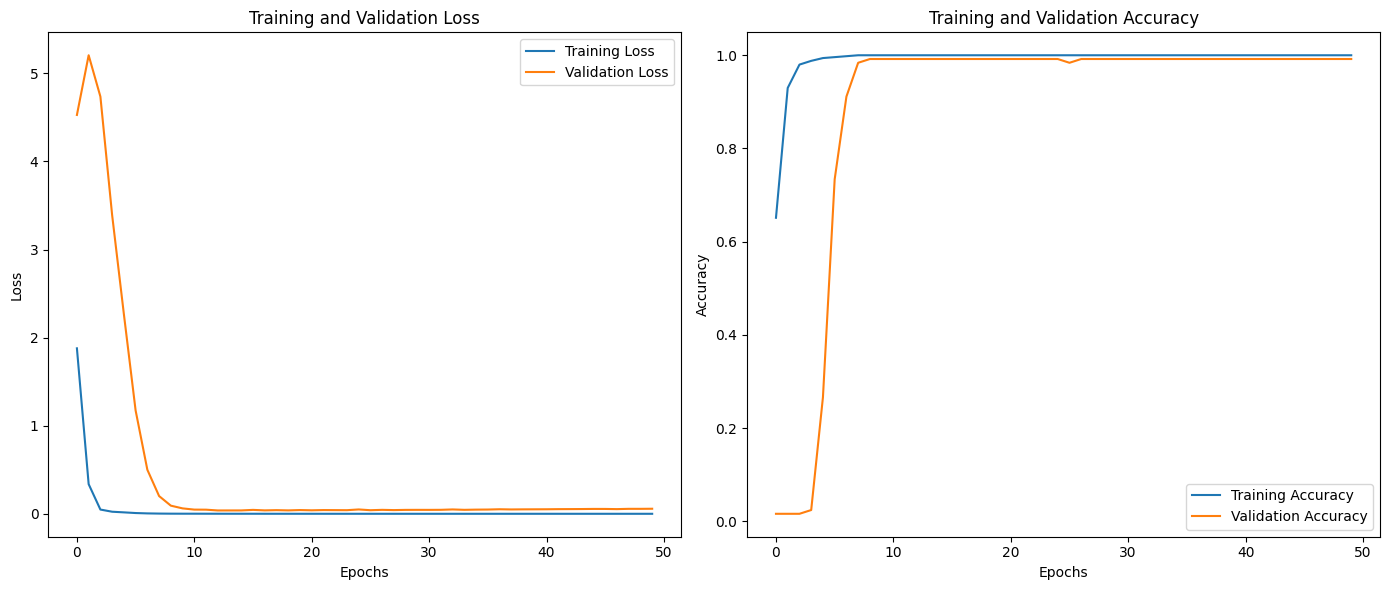

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.0

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
acc_per_fold = []
loss_per_fold = []
confusion_matrices = []

all_unique_classes = np.unique(y_samples)

for train_index, test_index in kf.split(X_samples):

    X_train, X_test = X_samples[train_index],X_samples[test_index]
    y_train, y_test = y_samples[train_index], y_samples[test_index]

    y_train = to_categorical(y_train, num_classes=len(all_unique_classes))
    y_test = to_categorical(y_test, num_classes=len(all_unique_classes))

    model = create_cnn_model((num_cases_per_sample, X.shape[1]), len(all_unique_classes))

    print(f'Training for fold {fold_no} ...')
    history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

    # Evaluate the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # model.save(f'tcn_model_fold_{fold_no}.h5')
    # print(f'Model for fold {fold_no} saved.')



    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    #     # Print the classification report
    print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))

        # Plot the confusion matrix
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes,labels=all_unique_classes)
    confusion_matrices.append(cm)
    # plt.figure(figsize=(20, 14))
    # sns.heatmap(data=cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    #     # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    #     # disp.plot()
    # plt.xlabel('Predicted')
    # plt.ylabel('Actual')
    # plt.title('Confusion Matrix')
    # plt.show()


    fold_no += 1

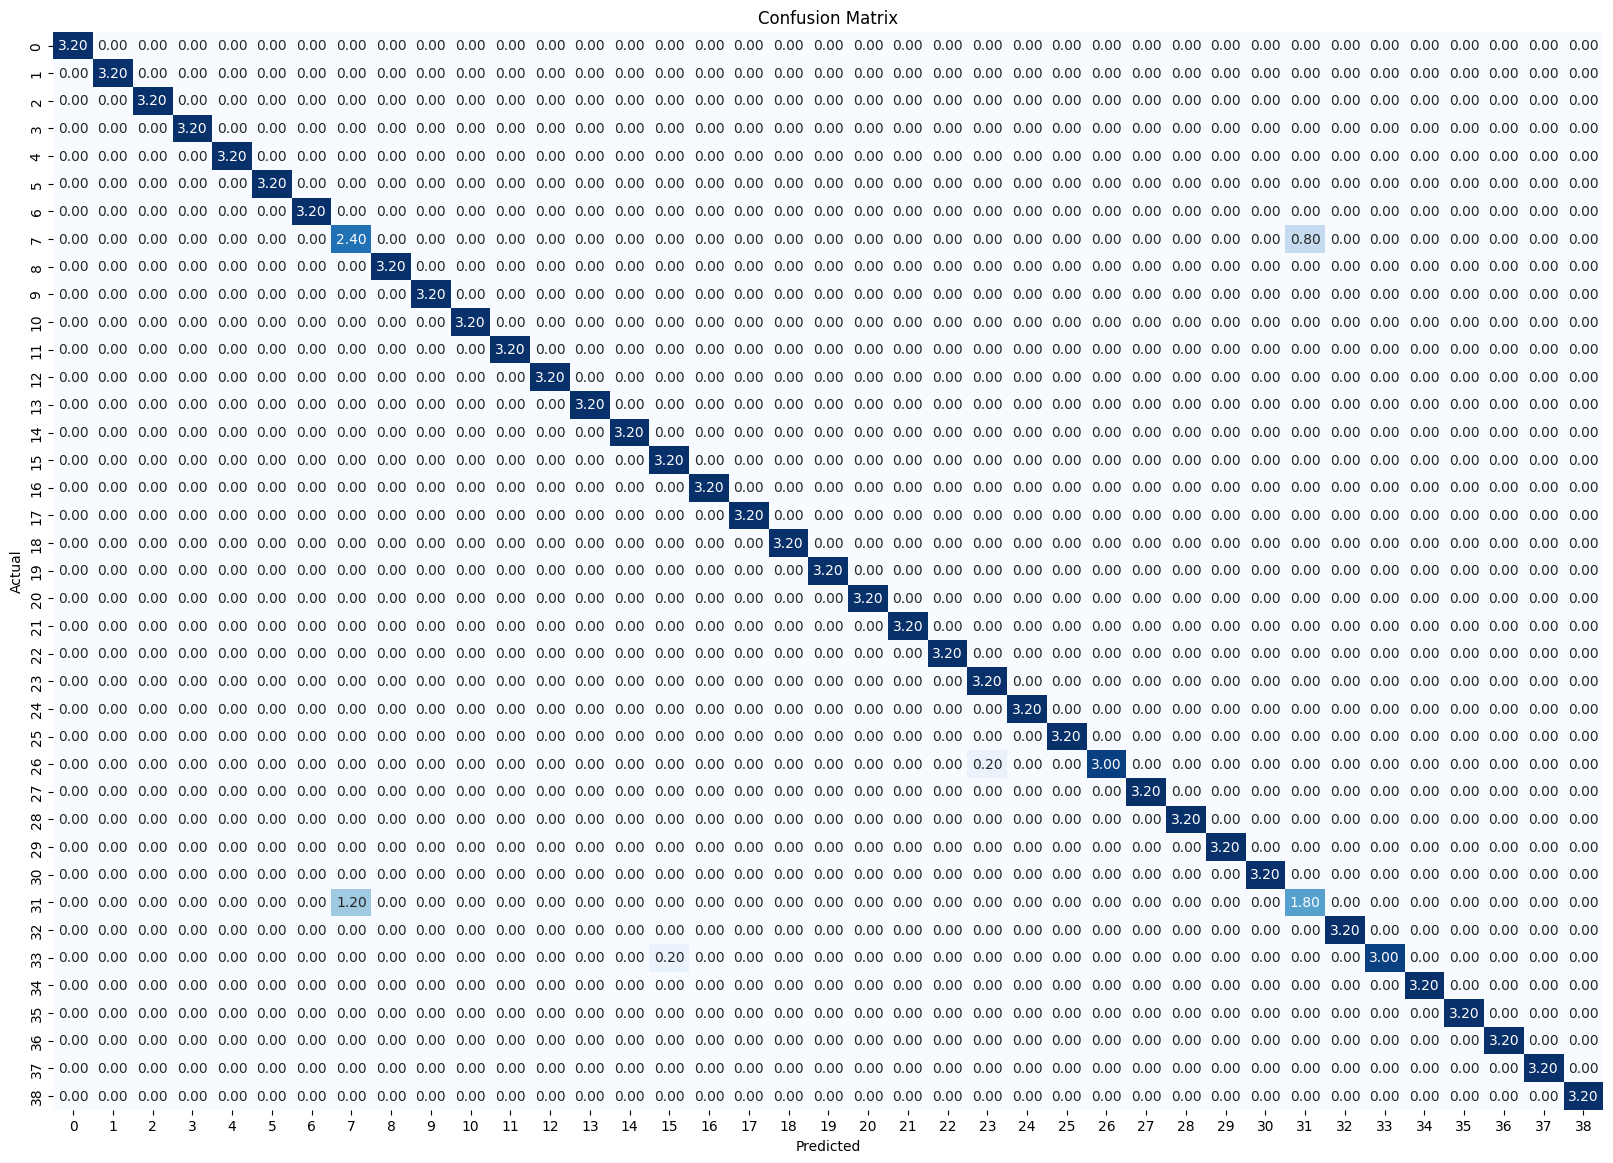

In [ ]:
avg_conf_matrix = np.zeros_like(confusion_matrices[0], dtype=np.float64) # Initialize an empty average matrix
for cm in confusion_matrices:
    avg_conf_matrix += cm  # Sum the matrices
avg_conf_matrix /= len(confusion_matrices)
plt.figure(figsize=(20, 14))
sns.heatmap(data=avg_conf_matrix, annot=True, fmt='.2f', cmap='Blues', cbar=False)
# disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix)
# disp.plot()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Average scores for all folds:
> Accuracy: 98.0774199962616 (+- 1.864357479717695)
> Loss: 0.05811572074890137


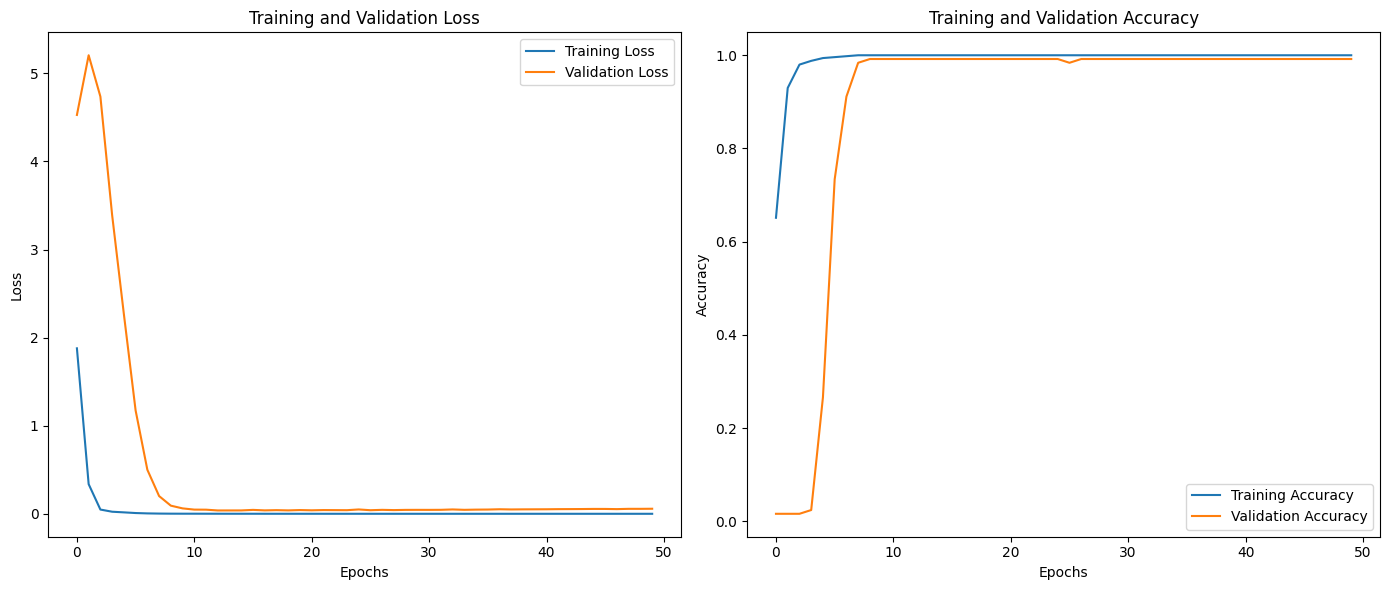

In [ ]:
# Plotting the metrics for each fold
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

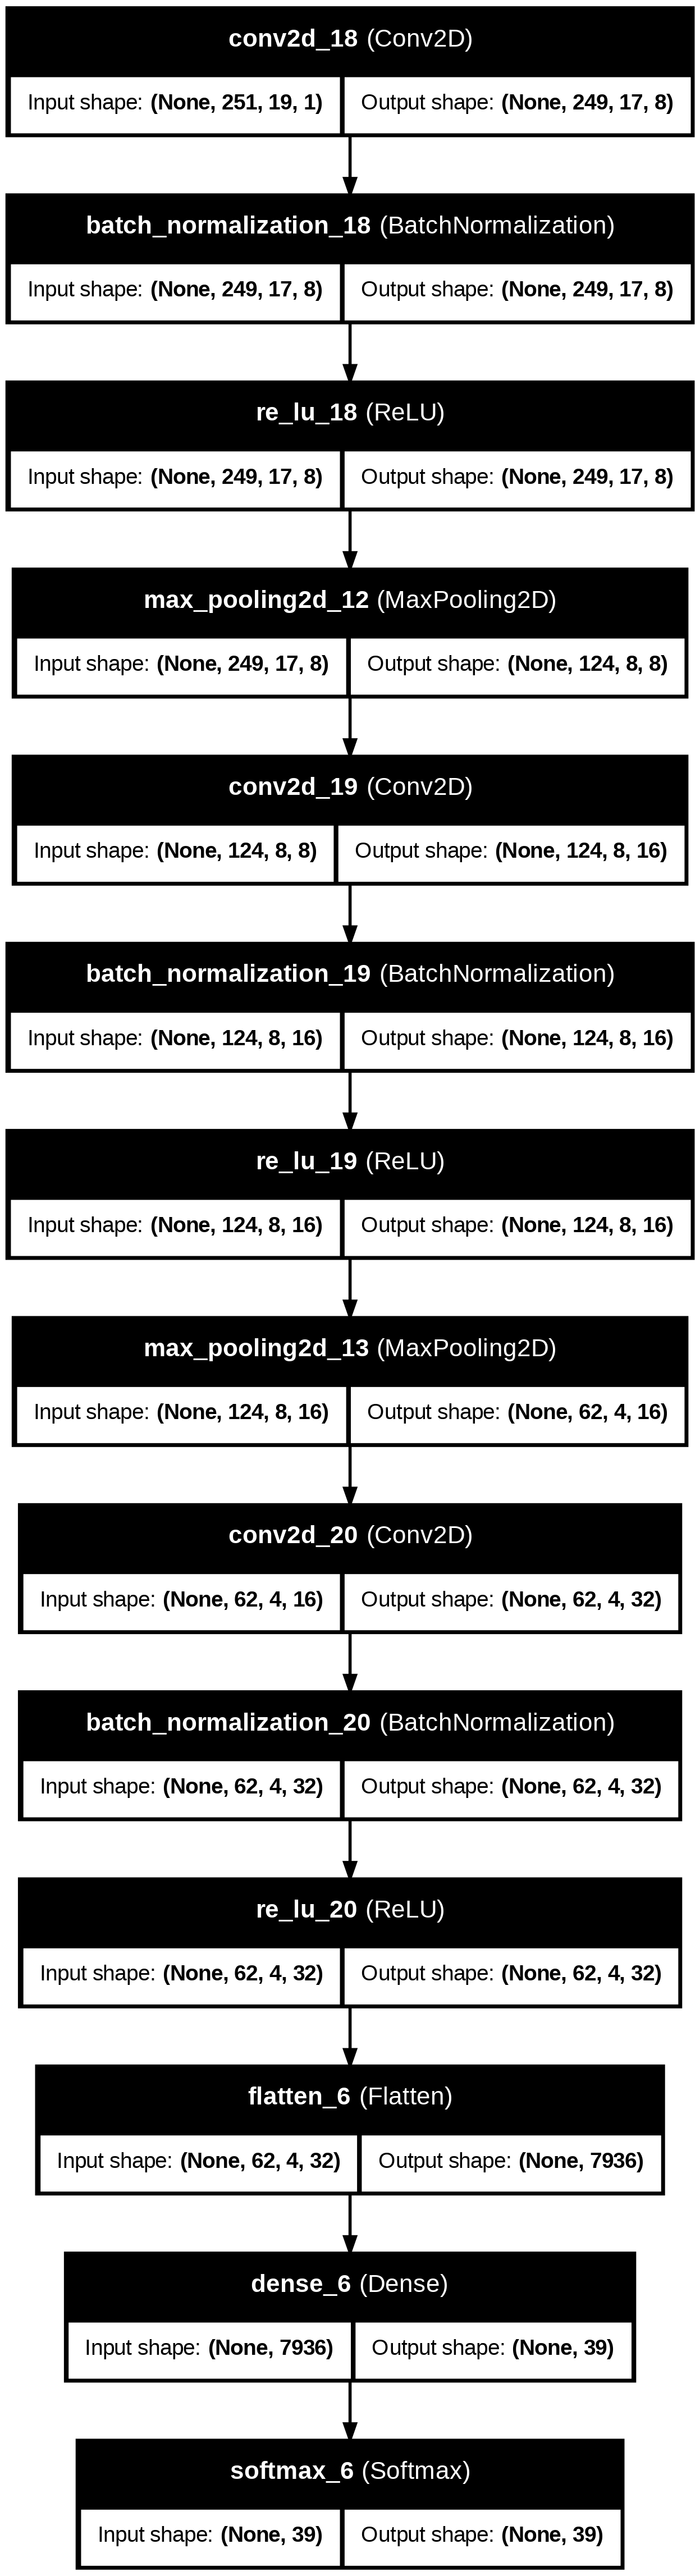

In [ ]:
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)